In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
os.chdir("C:/Users/sasai/Pandas")

In [3]:
df=pd.read_csv('C:/Users/sasai/Pandas/HousePrices.csv')

In [4]:
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [5]:
#y=df['Property_Sale_Price']
#x=df[['Dwell_Type']]

In [6]:
#lm=LinearRegression()

In [7]:
#lm.fit(x,y)

In [8]:
#yhat=lm.predict(x)

In [9]:
#print('intercept of the regression is:',lm.intercept_)
#print('Coef of Dwell_Type is:', lm.coef_)

In [10]:
#yhat[0:5]

In [11]:
#y[0:5]

In [12]:
# sns.residplot(df['Dwell_Type'],df['Property_Sale_Price'])

In [13]:
# Identifying the Null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [14]:
# Give the Exact null values in the dataset for upto 60 column from start
df.isnull().sum().head(60)

Id                   0
Dwell_Type           0
Zone_Class           0
LotFrontage        320
LotArea              0
Road_Type            0
Alley             1944
Property_Shape       0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
Dwelling_Type        0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType          14
MasVnrArea          14
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            59
BsmtCond            59
BsmtExposure        61
BsmtFinType1        59
BsmtFinSF1           0
BsmtFinType2        60
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           1
1stFlrSF   

In [15]:
# Give the Exact null values in the dataset for upto 22 column from end
df.isnull().sum().tail(22)

GarageYrBlt             113
GarageFinish            113
GarageCars                0
GarageArea                0
GarageQual              113
GarageCond              113
PavedDrive                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
PoolQC                 2065
Fence                  1669
MiscFeature            1993
MiscVal                   0
MoSold                    0
YrSold                    0
SaleType                  0
SaleCondition             0
Property_Sale_Price       0
dtype: int64

In [16]:
# Give the statistical information
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As We 

In [17]:
# Percentage of null values in the dataset for upto 60 from start
df.isnull().sum().head(60) / df.shape[0] * 100.00

Id                 0.000000
Dwell_Type         0.000000
Zone_Class         0.000000
LotFrontage       15.436565
LotArea            0.000000
Road_Type          0.000000
Alley             93.777135
Property_Shape     0.000000
LandContour        0.000000
Utilities          0.000000
LotConfig          0.000000
LandSlope          0.000000
Neighborhood       0.000000
Condition1         0.000000
Condition2         0.000000
Dwelling_Type      0.000000
HouseStyle         0.000000
OverallQual        0.000000
OverallCond        0.000000
YearBuilt          0.000000
YearRemodAdd       0.000000
RoofStyle          0.000000
RoofMatl           0.000000
Exterior1st        0.000000
Exterior2nd        0.000000
MasVnrType         0.675350
MasVnrArea         0.675350
ExterQual          0.000000
ExterCond          0.000000
Foundation         0.000000
BsmtQual           2.846117
BsmtCond           2.846117
BsmtExposure       2.942595
BsmtFinType1       2.846117
BsmtFinSF1         0.000000
BsmtFinType2       2

In [18]:
df['LotFrontage'].dtype

dtype('float64')

In [19]:
print(df.LotFrontage.median())
print(df.MasVnrArea.median())
print(df.GarageYrBlt.median())

70.0
0.0
1984.0


In [20]:
m1=df['LotFrontage'].astype('float').median(axis=0)
m1
df['LotFrontage'].replace(np.nan,m1,inplace=True)

In [21]:
median1=df['GarageYrBlt'].astype('float').median(axis=0)
median1
df['GarageYrBlt'].replace(np.nan,median1,inplace=True)

In [22]:
median2=df['MasVnrArea'].astype('float').median(axis=0)
median1
df['MasVnrArea'].replace(np.nan,median1,inplace=True)

In [23]:
categorical_data = df.fillna({'MiscFeature':'None',
                                           'Fence': 'No Fence',
                                           'PoolQC' : 'No Pool',
                                           'GarageCond' :'No Garage',
                                           'GarageQual' :'No Garage',
                                           'GarageFinish' :'No Garage',
                                           'GarageType' :'No Garage',
                                           'FireplaceQu' :'No Fireplace',
                                           'BsmtFinType2' : 'No Basement',
                                           'BsmtFinType1' : 'No Basement',
                                           'BsmtExposure' : 'No Basement',
                                           'BsmtCond' : 'No Basement',
                                           'BsmtQual' : 'No Basement',
                                           'Alley': 'No alley access'})

In [24]:
df.select_dtypes(include='object').columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
df.select_dtypes(include=np.number).columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [26]:
df_dummies = pd.get_dummies(df[['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]])

In [27]:
df_numeric = df[['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price']]

In [28]:
df1=pd.concat([df_numeric,df_dummies],axis=1)

In [29]:
df1.info

<bound method DataFrame.info of        Id  Dwell_Type  LotFrontage  LotArea  OverallQual  OverallCond  \
0       1          60         65.0     8450            7            5   
1       2          20         80.0     9600            6            8   
2       3          60         68.0    11250            7            5   
3       4          70         60.0     9550            7            5   
4       5          60         84.0    14260            8            5   
...   ...         ...          ...      ...          ...          ...   
2068  942          60         70.0     8755            8            4   
2069  943          90         63.0     7711            6            9   
2070  944          90        313.0    25000            4            6   
2071  945          20         52.0    14375            9            6   
2072  946          50         98.0     8820            9            9   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          20

In [30]:
df1.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [31]:
y=df['Property_Sale_Price']

In [32]:
x = df1.loc[ : , df1.columns != "Property_Sale_Price"]

In [33]:
x

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,70.0,8755,8,4,1936,1999,298.0,772,...,0,0,0,1,0,0,0,0,1,0
2069,943,90,63.0,7711,6,9,1936,1977,0.0,1440,...,0,0,1,0,1,0,0,0,0,0
2070,944,90,313.0,25000,4,6,1983,1996,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2071,945,20,52.0,14375,9,6,1958,1958,541.0,111,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


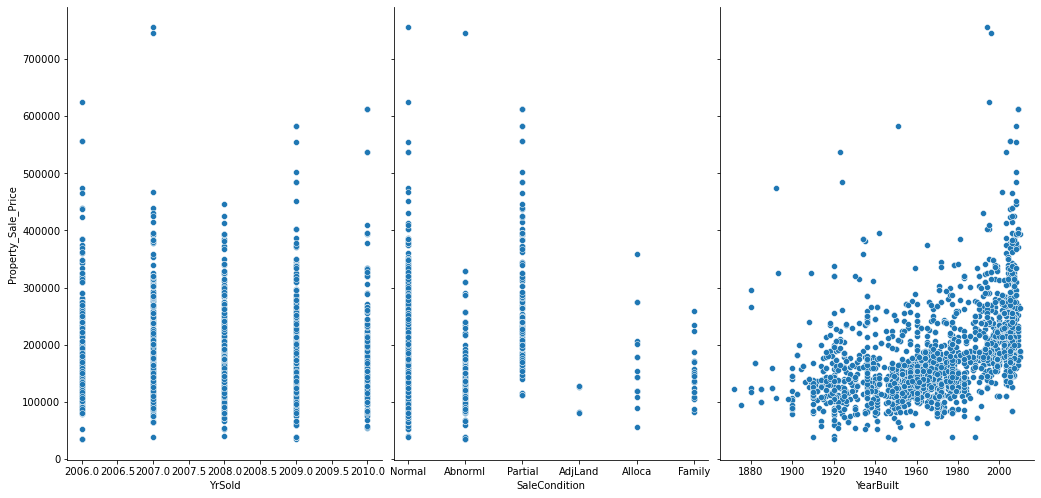

In [35]:
sns.pairplot(df, x_vars=['YrSold','SaleCondition','YearBuilt'], y_vars='Property_Sale_Price', size=7, aspect=0.7, kind='scatter')

<AxesSubplot:>

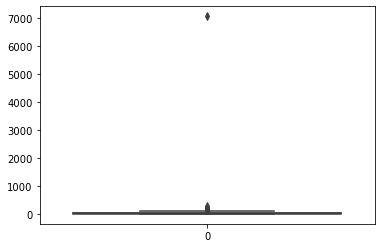

In [36]:
sns.boxplot(data=df["Dwell_Type"])

<AxesSubplot:>

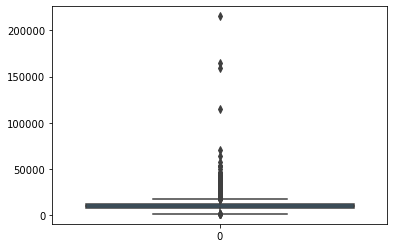

In [37]:
sns.boxplot(data=df["LotArea"])

<AxesSubplot:>

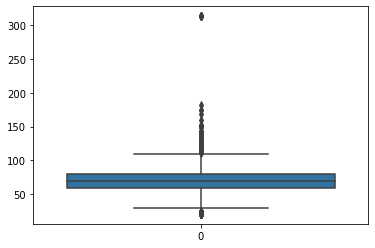

In [38]:
sns.boxplot(data=df["LotFrontage"])

<AxesSubplot:xlabel='Zone_Class', ylabel='Property_Sale_Price'>

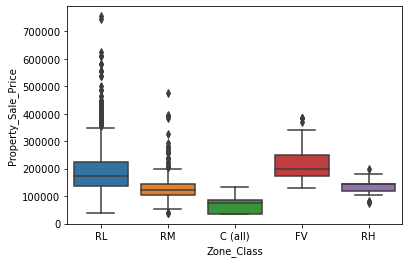

In [39]:
sns.boxplot(x=df['Zone_Class'], y=df['Property_Sale_Price'])

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=100)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# Representing LinearRegression as Lr(Creating linear Regression Object)
lm=LinearRegression()

In [43]:
# fit the model to the tarining data
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
# print the intercept
print(lm.intercept_)

-2686956.669438091


In [45]:
# Let's see the coefficient
coeff_df=pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Id,1.594099
Dwell_Type,-29.048959
LotFrontage,144.358906
LotArea,0.301416
OverallQual,396.270195
...,...
SaleCondition_AdjLand,-11823.852983
SaleCondition_Alloca,18281.012934
SaleCondition_Family,-11090.261153
SaleCondition_Normal,6693.970431


In [46]:
# Making Prediction using the model
y_pred=lm.predict(x_test)


In [47]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test, y_pred)

In [48]:
from math import sqrt
rmse=sqrt(mse)

In [49]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 1500354466.4654484
Root_Mean_Sqaured_Erro: 38734.4093341495
r_sqaure_value: 0.7601375071249734


In [50]:
import statsmodels.api as sm

In [51]:
x_train_sm=x_train
# Unlike SKLearn, statsmodels don't automatically fit a constant,
# So you need to use method sm.add_constant(x) in order to add a constant.
x_train_sm=sm.add_constant(x_train_sm)
# Create  a fitted model in one line.
lm_1=sm.OLS(y_train,x_train_sm).fit()

# Print the coefficients
lm_1.params

const                   -369547.489608
Id                            1.594099
Dwell_Type                  -29.048959
LotFrontage                 144.358906
LotArea                       0.301416
                             ...      
SaleCondition_AdjLand    -75401.915721
SaleCondition_Alloca     -45297.049791
SaleCondition_Family     -74668.323879
SaleCondition_Normal     -56884.092295
SaleCondition_Partial    -45558.828889
Length: 290, dtype: float64

In [52]:
print(lm_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.959
Model:                             OLS   Adj. R-squared:                  0.935
Method:                  Least Squares   F-statistic:                     40.74
Date:                 Sun, 08 Aug 2021   Prob (F-statistic):          2.10e-189
Time:                         23:17:34   Log-Likelihood:                -6881.7
No. Observations:                  621   AIC:                         1.422e+04
Df Residuals:                      394   BIC:                         1.522e+04
Df Model:                          226                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

<AxesSubplot:>

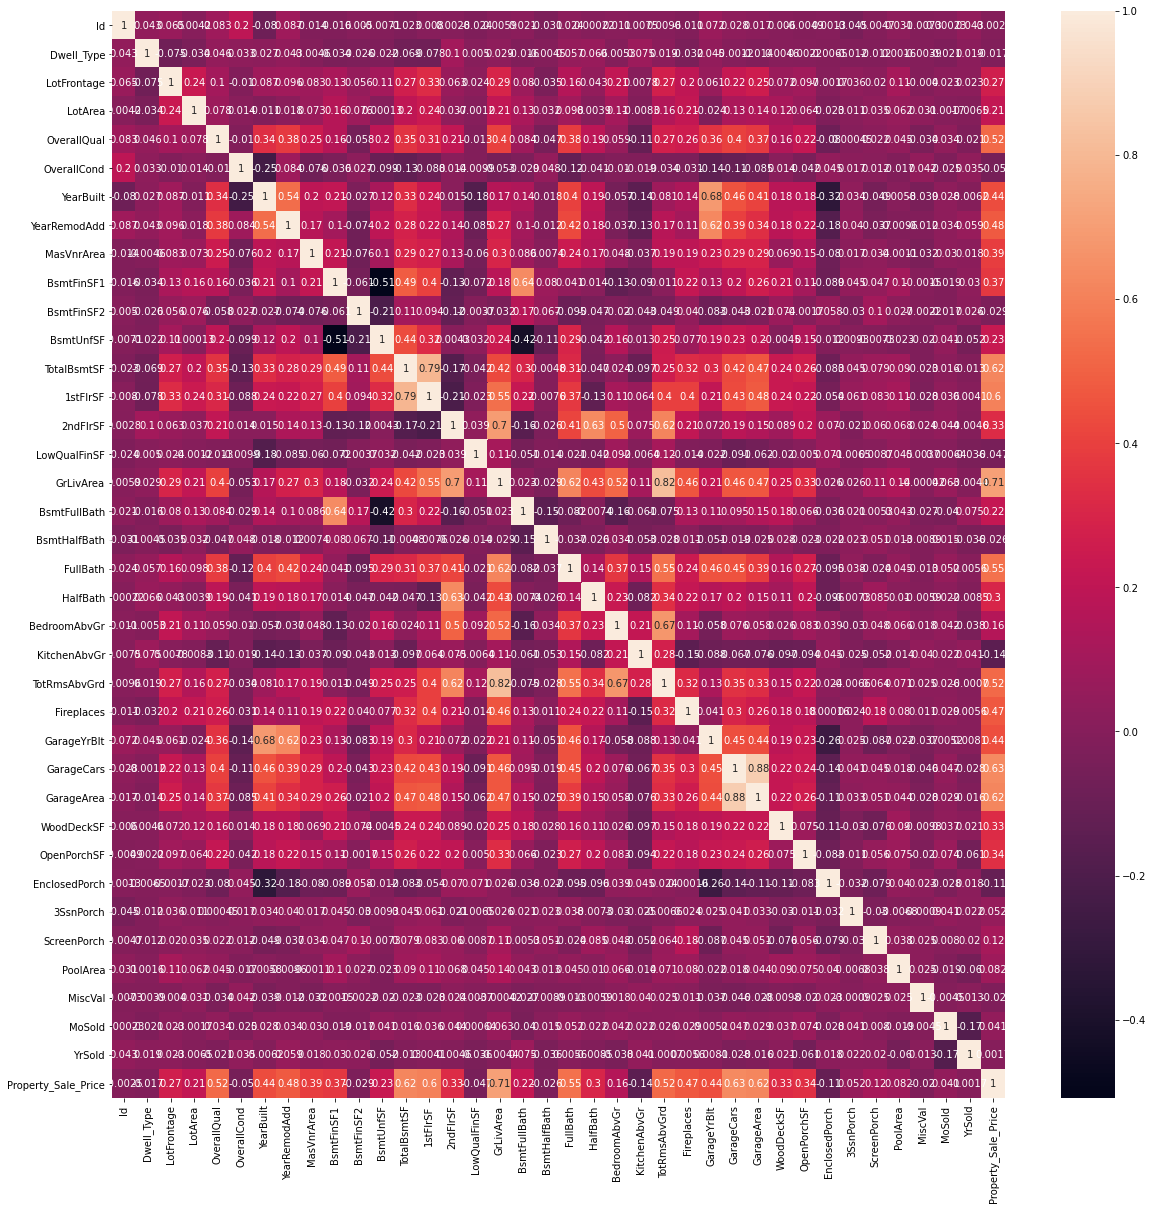

In [53]:
plt.figure(figsize= (20,20))
sns.heatmap(df_numeric.corr(),annot=True)

Text(0, 0.5, 'Dependent_Variable')

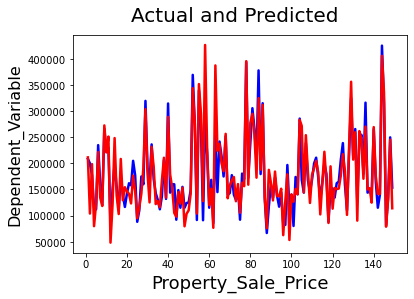

In [54]:
# Actual vs Predicted
# Check For the first 150 Observations

c=[i  for i in range(1,150,1)]
fig=plt.figure()
plt.plot(c,y_test[1:150],color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred[1:150],color="red",linewidth=2.5,linestyle="-")
fig.suptitle('Actual and Predicted',fontsize=20)        #plot Heading
plt.xlabel('Property_Sale_Price',fontsize=18)                       #x-label
plt.ylabel('Dependent_Variable',fontsize=16)                #y-Label

ValueError: x and y must have same first dimension, but have shapes (99,) and (1452,)

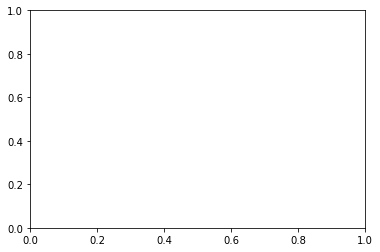

In [55]:
# Error terms

c=[i  for i in range(1,100,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle('Error terms',fontsize=20)        #plot Heading
plt.xlabel('Index',fontsize=18)                       #x-label
plt.ylabel('Actual-Predicted',fontsize=16)                #y-Label

In [56]:
print('Mean_Squared_Error:',mse)
print('r_square_value:',r_sqaured)

Mean_Squared_Error: 1500354466.4654484
r_square_value: 0.7601375071249734


In [57]:
x_train_final=x_train
"""Unlike Sklearn,Statemosels don't automatically fit a constant,so you need to use the method sm.odd_constant(x) in order to 
add a constatnt or intercept"""
x_train_final=sm.add_constant(x_train_final)
#Create a fitted model in one line
lm_final=sm.OLS(y_train,x_train_final).fit()

print(lm_final.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.959
Model:                             OLS   Adj. R-squared:                  0.935
Method:                  Least Squares   F-statistic:                     40.74
Date:                 Sun, 08 Aug 2021   Prob (F-statistic):          2.10e-189
Time:                         23:18:00   Log-Likelihood:                -6881.7
No. Observations:                  621   AIC:                         1.422e+04
Df Residuals:                      394   BIC:                         1.522e+04
Df Model:                          226                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# For each X, Calculate VIF and save in dataframe
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns

C:\Users\sasai\anaconda3.32\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [60]:
vif.round(2)

,VIF Factor,features
0,1.27,Id
1,1.11,Dwell_Type
2,1.87,LotFrontage
3,2.15,LotArea
4,1.76,OverallQual
...,...,...
284,inf,SaleCondition_AdjLand
285,inf,SaleCondition_Alloca
286,inf,SaleCondition_Family
287,inf,SaleCondition_Normal


<AxesSubplot:xlabel='LotFrontage', ylabel='Property_Sale_Price'>

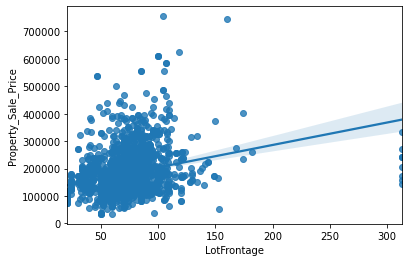

In [61]:
sns.regplot(x='LotFrontage', y='Property_Sale_Price',data=df) #regression plot

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

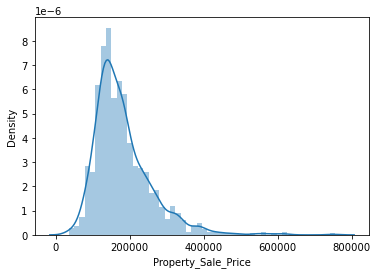

In [62]:
sns.distplot(df['Property_Sale_Price'].astype('float'))